In [1]:
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt
from PIL import Image
from scipy import signal
import cv2

import os
import random

In [65]:
dose = np.load('/home/peter/Documents/dose_estimator-git/data/numpy/dose_test.npy')
pet = np.load('/home/peter/Documents/dose_estimator-git/data/numpy/pet_test.npy')
ct = np.load('/home/peter/Documents/dose_estimator-git/data/numpy/ct_test.npy')

In [50]:
ct = np.load('/home/peter/Documents/dose_estimator-git/data/numpy/ct_train.npy')

In [66]:
ct.shape

(405, 128, 128)

In [67]:
for x in range(0, 100):
    #print(pet[x].mean())
    #print(dose[x].mean())
    print(ct[x].min())
    print(ct[x].max())
    print(" ")

-1024.0103759765625
1114.7335205078125
 
-1024.0103759765625
1136.85205078125
 
-1024.0103759765625
1126.72998046875
 
-1024.0103759765625
1114.546142578125
 
-1024.0103759765625
1116.79541015625
 
-1024.0103759765625
893.455078125
 
-1024.0103759765625
1085.0235595703125
 
-1024.0103759765625
1045.2852783203125
 
-1024.0103759765625
905.17041015625
 
-1024.0103759765625
906.1076049804688
 
-1024.0103759765625
856.9971313476562
 
-1024.0103759765625
886.6133422851562
 
-1024.0103759765625
1016.2313842773438
 
-1024.0103759765625
1099.8316650390625
 
-1024.0103759765625
1091.4903564453125
 
-1024.0103759765625
1029.2587890625
 
-1024.0103759765625
986.146484375
 
-1024.0103759765625
1625.3328857421875
 
-1024.0103759765625
2832.101806640625
 
-1024.0103759765625
3059.28466796875
 
-1024.0103759765625
3070.8125
 
-1024.0103759765625
3071.0
 
-1024.0103759765625
3070.625244140625
 
-1024.0103759765625
3071.0
 
-1024.0103759765625
3071.0
 
-1024.0103759765625
2848.221923828125
 
-1024.0103

In [68]:
def normalize_array(inp, img_size=81):
    array = inp.copy()
    for i in range(array.shape[0]):
        pic = array[i:(i+1),:,:]
        pic = pic + pic.min()
        mask = (pic != 0.0)
        pic[mask] = pic[mask] / pic.max()
        #pic[mask] = ((pic[mask] - pic.min()) / (pic.max() - pic.min()))  # pic / np.linalg.norm(pic) -1 # 
        #pic[mask] = (pic[mask] - pic.mean()) / pic.std()
        #pic[mask] = ((pic[mask] - pic.min()) / (pic.max() - pic.min()))
        array[i:(i+1),:,:] = pic
    return array

In [69]:
def filter_zeros(array):
    bad_idx = []
    for i in range(array.shape[0]):
        if np.count_nonzero(array[i,:,:]) == 0:
            bad_idx.append(i)
    for idx in bad_idx:
        while True:
            rand_idx = random.choice(range(array.shape[0]))
            if rand_idx not in bad_idx: break
        array[idx] = array[rand_idx]
    return array

In [12]:
def upscale_array(array):
    out = np.empty((array.shape[0], 200, 200))
    for i in range(array.shape[0]):
        pic = array[i,:,:]
        out[i,:,:] = cv2.resize(pic, dsize=(200, 200))
    return out

In [70]:
dose_norm = normalize_array(dose)
pet_norm = normalize_array(pet)

In [71]:
pet_norm = filter_zeros(pet_norm)
dose_norm = filter_zeros(dose_norm)

In [72]:
pet_norm.shape

(405, 128, 128)

In [73]:
ct_norm = normalize_array(ct)

In [74]:
ct_norm = filter_zeros(ct_norm)


In [75]:
count_pet = 0
count_dose = 0
count_ct = 0
for x in range(ct_norm.shape[0]):
    """if np.count_nonzero(pet_norm[x]) == 0:
        count_pet += 1
    if np.count_nonzero(dose_norm[x]) == 0:
        count_dose += 1"""
    if np.count_nonzero(ct_norm[x]) == 0:
        count_ct += 1

In [77]:
count_pet

0

In [78]:
ct_norm.shape

(405, 128, 128)

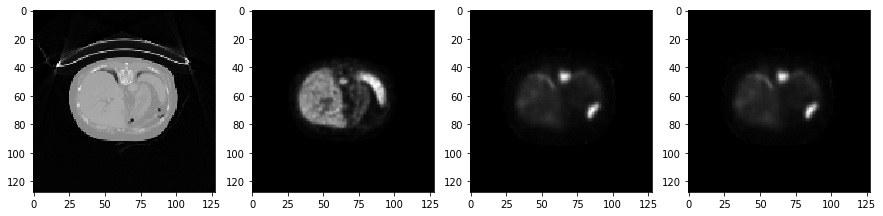

In [79]:
x = 60
fig, axes = plt.subplots(1, 4, figsize=(15,5))
axes[0].imshow(ct[x], cmap="gray")
axes[1].imshow(pet[x], cmap="gray")
axes[2].imshow(dose[x], cmap="gray")
axes[3].imshow(dose_norm[x], cmap="gray")

In [80]:
np.sum(np.isnan(ct_norm))

0